## 프로젝트 1. 경사 하강법으로 이미지 복원하기

### 프로젝트 개요와 목표

이번 프로젝트에서 우리가 풀 문제는 다음과 같습니다.
치명적인 버그가 있는 weird_function() 이라는 함수가 original_image 라고 하는 어느 이미지 파일을 입력받아 broken_image 라는 이미지를 리턴했습니다. 우리는 이 오염된 이미지를 삭제하려고 했으나 실수로 원본 이미지 파일을 삭제해버린 상황입니다.
다행히도 weird_function()의 소스코드는 삭제되지 않았습니다.
우리의 목표는 오염된 이미지와 weird_function()의 코드만을 가지고 원본 이미지 파일을 복원하는 것입니다.

*참고자료: https://github.com/jcjohnson/pytorch-examples, NYU Intro2ML*

In [1]:
%matplotlib inline
import torch
import pickle
import matplotlib.pyplot as plot

In [2]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

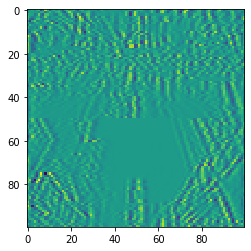

In [3]:
plot.imshow(  broken_image.view(100,100) ) 

In [4]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for ii in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if ii % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [5]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image, 2)

In [6]:
random_tensor = torch.randn(10000, dtype = torch.float)
print(random_tensor)
print(weird_function(random_tensor))

tensor([ 0.6969,  0.7795, -0.6669,  ...,  0.5794,  0.1418, -0.0024])
tensor([-0.1144, -0.0476,  0.1065,  ...,  0.0855,  0.0747,  0.0311])


In [7]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at ', i, ' = ', loss.item())

Loss at  0  =  12.146331787109375
Loss at  1000  =  1.0993139743804932
Loss at  2000  =  0.5335873365402222
Loss at  3000  =  0.37199896574020386
Loss at  4000  =  0.29210254549980164
Loss at  5000  =  0.24262835085391998
Loss at  6000  =  0.20752525329589844
Loss at  7000  =  0.18003973364830017
Loss at  8000  =  0.15698044002056122
Loss at  9000  =  0.1366879642009735
Loss at  10000  =  0.11822082102298737
Loss at  11000  =  0.10100717097520828
Loss at  12000  =  0.08468197286128998
Loss at  13000  =  0.06900487095117569
Loss at  14000  =  0.053814616054296494
Loss at  15000  =  0.03900286555290222
Loss at  16000  =  0.024499056860804558
Loss at  17000  =  0.021160956472158432
Loss at  18000  =  0.021166324615478516
Loss at  19000  =  0.021167520433664322


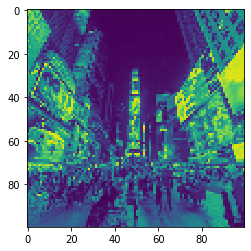

In [8]:
plot.imshow(  random_tensor.view(100,100).data  )

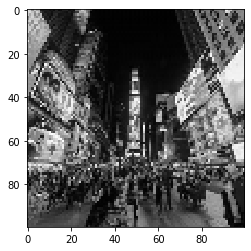

In [9]:
plot.imshow(  random_tensor.view(100,100).data,cmap = 'gray')